In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=100
CHANNELS=3
EPOCHS=15

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train_another",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 10000 files belonging to 2 classes.


In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2000 files belonging to 2 classes.


In [5]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "validation_another",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2000 files belonging to 2 classes.


In [7]:
class_name = train_dataset.class_names

In [8]:
class_name

['damage', 'no_damage']

tf.Tensor(1, shape=(), dtype=int32)


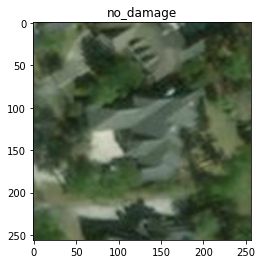

tf.Tensor(0, shape=(), dtype=int32)


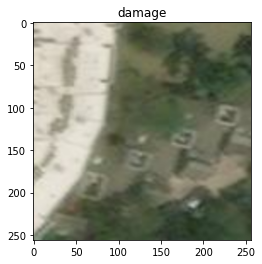

In [9]:
for img,label in train_dataset.take(1):
    for i in range(2):
        plt.imshow(img[i].numpy().astype("uint32"))
        plt.title(class_name[label[i]])
        print(label[i])
        plt.show()

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

In [11]:
flip_and_rot = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [12]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)
model=models.Sequential([
    resize_and_rescale,
    flip_and_rot,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
    
])

In [13]:
model.compile(
optimizer='adam',
loss="binary_crossentropy",
    metrics=['accuracy']
)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
earlystop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [16]:
model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset,
    callbacks=[earlystop]
)

Epoch 1/15
100/100 [==============================] - 1240s 11s/step - loss: 0.6788 - accuracy: 0.5594 - val_loss: 0.5754 - val_accuracy: 0.7715
Epoch 2/15
100/100 [==============================] - 908s 9s/step - loss: 0.5129 - accuracy: 0.7613 - val_loss: 0.4289 - val_accuracy: 0.8220
Epoch 3/15
100/100 [==============================] - 680s 7s/step - loss: 0.3194 - accuracy: 0.8634 - val_loss: 0.2725 - val_accuracy: 0.8875
Epoch 4/15
100/100 [==============================] - 632s 6s/step - loss: 0.2364 - accuracy: 0.9007 - val_loss: 0.2021 - val_accuracy: 0.9180
Epoch 5/15
100/100 [==============================] - 631s 6s/step - loss: 0.2000 - accuracy: 0.9164 - val_loss: 0.1771 - val_accuracy: 0.9355
Epoch 6/15
100/100 [==============================] - 629s 6s/step - loss: 0.1812 - accuracy: 0.9261 - val_loss: 0.1665 - val_accuracy: 0.9320
Epoch 7/15
100/100 [==============================] - 649s 6s/step - loss: 0.1606 - accuracy: 0.9341 - val_loss: 0.1616 - val_accuracy: 0.93

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [18]:
scores=model.evaluate(test_dataset)

20/20 [==============================] - 49s 2s/step - loss: 0.1758 - accuracy: 0.9350


In [19]:
model.save("flood.h5")